## Projektna naloga

Podatkovno rudarjenje, naloga, `DATUM`  
**`Denis Popović`**

### Podatki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

description = pd.read_csv("Data/steam_description_data.csv")
media = pd.read_csv("Data/steam_media_data.csv")
requirements = pd.read_csv("Data/steam_requirements_data.csv")
support = pd.read_csv("Data/steam_support_info.csv")
steam = pd.read_csv("Data/steam.csv")
tag = pd.read_csv("Data/steamspy_tag_data.csv")

## Najbolj popularni developerji ali podobne zanimivosti

`Najbolj popularni developerji so tisti, ki imajo fanbase največji (število prodanih kopij vseh njihovih iger). Tuki ne potrebujemo pregledovati če imajo popularne igre ali ne, saj se v gaming industriji veliko krat zgodi to, da developerji imajo tako dobre kot tudi slabe igre. Tuki je važno da jih ljudi poznajo oz. da posedujejo njihovo igro. Kar je lahko tuki problem, je ta da eni developerji imajo več iger kot drugi developerji in se lahko zgodi to, da npr.: ena oseba ima več iger od istega developerja in bomo isto osebo šteli večkrat. Če pa na problem pogledamo drugače nas to ne moti, saj developerjem, ki na vsakih par let izdajajo igre so bolj popularni in se bolj zapomnijo ljudem.`

In [2]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
import re

def getOwners(s):
    t = s.split("-")
    lowerBound = int(t[0])
    upperBound = int(t[1])
    return (lowerBound+upperBound)/2

def getYear(s):
    return int(s.split("-")[0])
    
def getName(s):
    return re.sub("\s.Linux.|\s.Mac.","",s)

In [36]:
def getDevelopers(year,top):
    devels = dict()
    for release_date, devel, owners, price in steam[["release_date","developer","owners","price"]].values:
        for n in devel.split(";"):
            name = getName(n)
            devels.setdefault(name,[0,0,False,0,0])
            devels[name][0] += getOwners(owners)
            devels[name][1] += 1
            if(float(price) == 0.0): devels[name][3] += 1
            else: devels[name][4] += 1
            if(year <= getYear(release_date)): devels[name][2]= True
    
    devels = dict(sorted(devels.items(), key=lambda k: k[1][0], reverse=True))
    devels_top = dict()
    i = 0
    print("Top %d najbolj popularnih developerjev\n"%top)
    for name, value in devels.items():
        if(i >= top): break
        if(value[2]):
            print(name)
            devels_top[name] = value
        i += 1 
    return devels_top

In [37]:
devels = getDevelopers(2013,15)

Top 15 najbolj popularnih developerjev

Valve
Feral Interactive
Hidden Path Entertainment
PUBG Corporation
Aspyr
Digital Extremes
Bethesda Game Studios
Smartly Dressed Games
Firaxis Games
Gearbox Software
Ubisoft Montreal
Relic Entertainment
Facepunch Studios
Avalanche Studios
CREATIVE ASSEMBLY


`Z naslednjimi vizualizacijami bmo pogledali zakaj so ti developerji popularni`

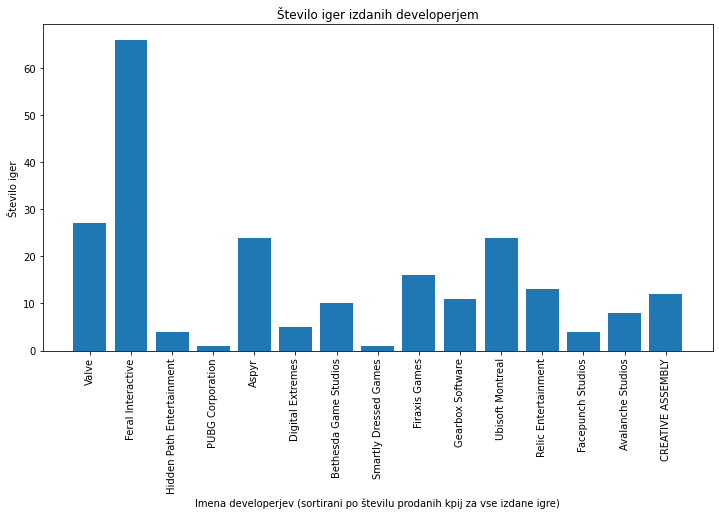

In [54]:
games = []
for v in devels.values():
    games.append(v[1])

plt.figure(figsize=(12,6))
plt.bar(devels.keys(),games)
plt.xticks(range(len(devels.keys())), devels.keys(), rotation=90)
plt.xlabel("Imena developerjev (sortirani po številu prodanih kopij za vse izdane igre)")
plt.ylabel("Število iger")
plt.title("Število iger izdanih developerjem")
plt.show()

`Že iz prvega grafa vidimo kako nekateri podatki iztopajo (Feral Interactive, PUBG Corporation, Smartly Dressed Games)`

In [39]:
develsByNumGames = dict(sorted(devels.items(), key=lambda k: k[1][1], reverse=True))
free = []
paid = []
for v in develsByNumGames.values():
    free.append(v[3])
    paid.append(v[4])


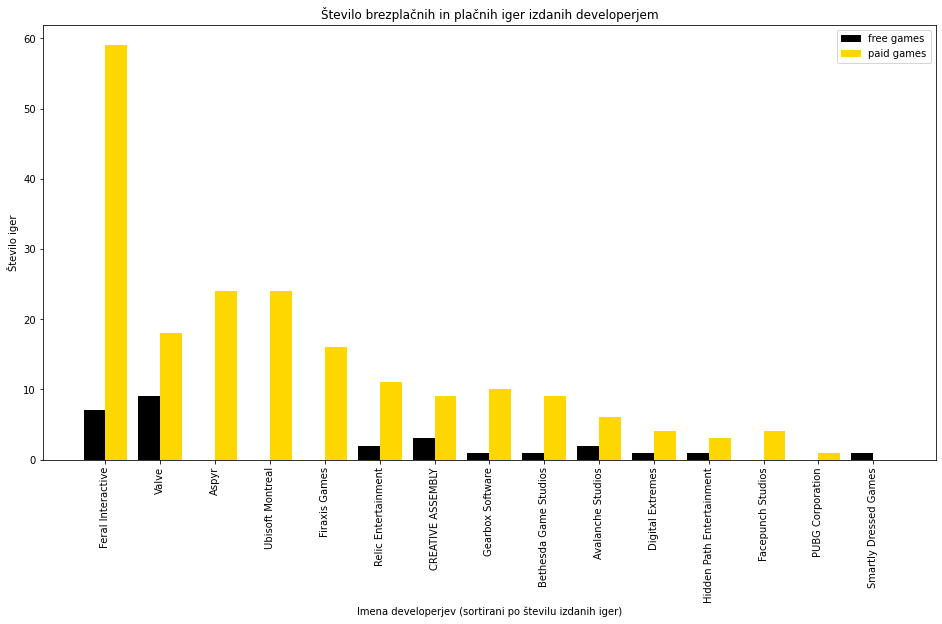

In [55]:
plt.figure(figsize=(16,8))
plt.bar(np.arange(len(develsByNumGames.keys()))-0.2, free, width=0.4, color="black", align="center", label="free games")
plt.bar(np.arange(len(develsByNumGames.keys()))+0.2, paid, width=0.4, color="gold", align="center", label="paid games")
plt.xticks(range(len(develsByNumGames.keys())), develsByNumGames.keys(), rotation=90)
plt.legend()
plt.xlabel("Imena developerjev (sortirani po številu izdanih iger)")
plt.ylabel("Število iger")
plt.title("Število brezplačnih in plačnih iger izdanih developerjem")
plt.show()

Text(0.5, 1.0, 'Popularnost developerjev')

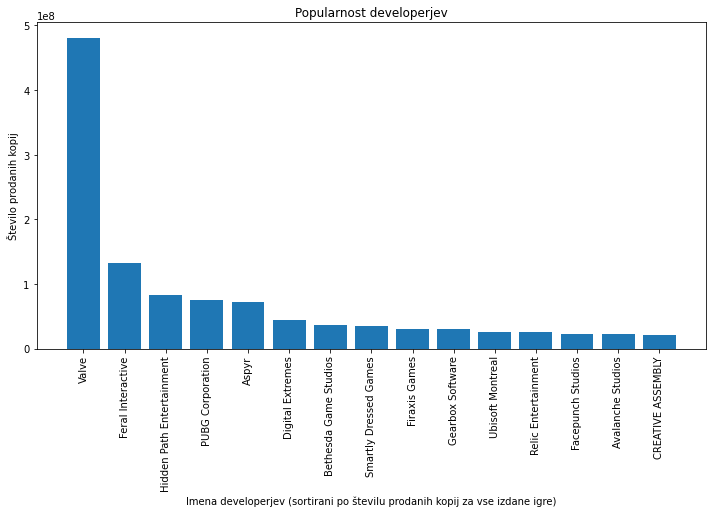

In [69]:
owners = []
games = []
for v in devels.values():
    owners.append(v[0])
    games.append(v[1])

plt.figure(figsize=(12,6))
plt.bar(devels.keys(),owners)
plt.xticks(range(len(devels.keys())), devels.keys(), rotation=90)
plt.xlabel("Imena developerjev (sortirani po številu prodanih kopij za vse izdane igre)")
plt.ylabel("Število prodanih kopij")
plt.title("Popularnost developerjev")

`Iz zgornjih grafov lahko presodimo, da populacija developerja ni odvisna od števila izdanih iger in če je igra brezplačna ali plačilna. Npr.: PUBG Corporation in Smartly Dressed Games imata izdano samo po eno igro,pri tem, da je eno potrebno kupiti, druga pa brezplačna in sta še vedno v top 10 developerjev. Feral Interactive pa v številu iger zelo odstopa od drugih developerjev zaradi tega, ker sodelujejo z drugi developerji in spremenijo platformo npr.:(Linux, MacOs, iOS, Android) igre, ki so izdane s strani drugega developerja in v tem je smisel za tako veliko število "izdanih" iger.`

`Glede na populacijo je developer Valve v ogromni prednosti pred drugimi developerji. Namreč podatkovna baza pripada Steam spletni trgovini, kar pa pripada developerju Valve. Obstajajo tudi druge spletne trgovine, ampak niso tako velike kot Steam, se pravi tudi če je Steam v lastništvu Valve nam ta podatek ne uniči dejstva zakaj je Valve tako uspešen developer.`